# What is the spectrum of graph Laplacian?

The emerging field of Graph Signal Processing argue that we can use the eigenbasis of the graph laplacian to perform a Graph Fourier Transform. Problem is, from a direct perspective, the link with fourier transform is not easily understood.

We are going to make few experiments to gain a bit of intuition about that. 

The unnormalized laplacian of a graph $\mathcal{G}=\{\mathcal{V},\mathcal{E},\mathbf{W}\}$ is determined by the following formula:
$$
\mathbf{L} = \mathbf{D} - \mathbf{W}
$$
Where $\mathbf{D}$ is the degree diagonal matrix, and $\mathbf{W}$ the weight matrix, such that we have for every rows and columns:
$$
\sum_{i} L_{ij} = 0\\
\sum_{j} L_{ij} = 0
$$
If we write $\mathbf{U}$ the sorted eigenbasis of the Laplacian, we can write the projection of signal $\mathbf{x}$ into the fourier basis:
$$
\hat{\mathbf{x}} = \mathbf{Ux}\\
\mathbf{x} = \mathbf{U^{-1}\hat{x}}\\
$$


# Experiment

Using _pygsp_ we are going to create a a grid graph and look at the eigenvalues on this one.

In [2]:
import pygsp
import numpy
import scipy.misc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal
%matplotlib inline

For this experiment, we are going to consider an image as signal, over a 2D grid (pretty classic though).

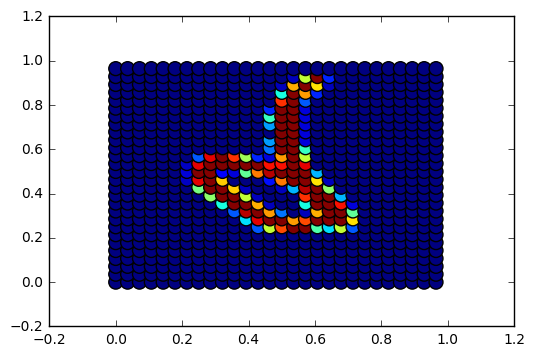

In [3]:
mnist = scipy.misc.imread("mnist.png", flatten=True)/255
gsz = mnist.shape[0]
mnist = numpy.reshape(mnist,[mnist.size,1])
g = pygsp.graphs.Grid2d(gsz)
pygsp.plotting.plot_signal(g, mnist)

We used to construct the laplacian and eigenbasis on our own here, but _pygsp_ contains methods to do just that.

In [4]:
g.compute_fourier_basis()

# Fourier Modes

Now lets plot some modes of the fourier basis. The diversity of modes is quite impressive though...

Plotting mode 416


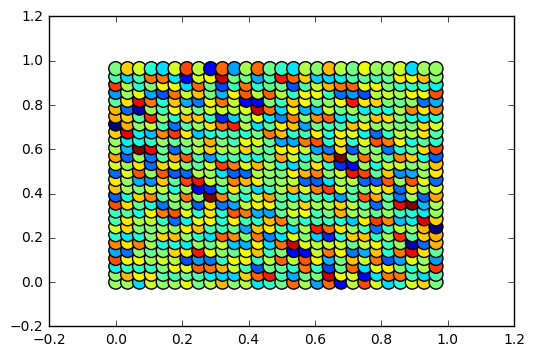

Plotting mode 372


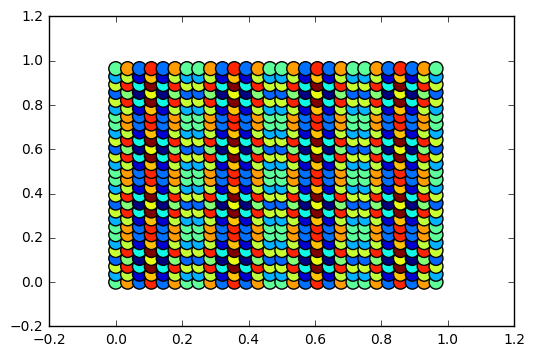

Plotting mode 565


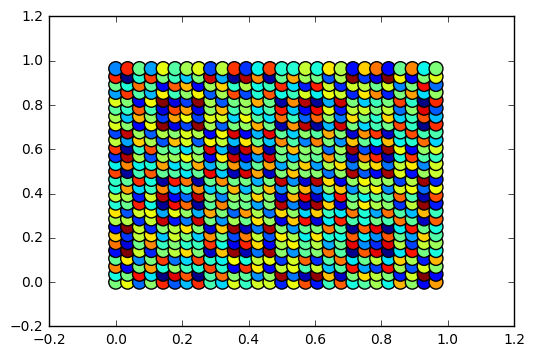

Plotting mode 193


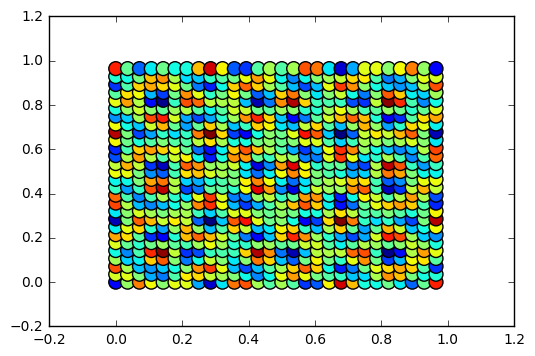

Plotting mode 96


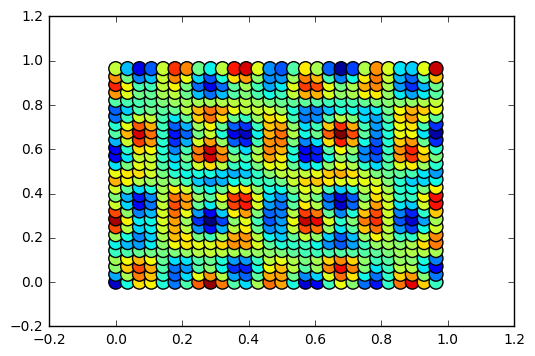

In [5]:
for i in range(0,5):
    m = numpy.random.randint(0,gsz*gsz)
    print("Plotting mode %i"%m)
    mode_f = numpy.zeros([gsz*gsz,1])
    mode_f[m,0] = 1
    mode_g = numpy.float32(g.U.dot(mode_f)) # float32 to discard little variations that make the plotting wrong
    pygsp.plotting.plot_signal(g,mode_g)
    plt.show()

# Recontruction with the $n$ major modes

Now we are going to project the signal into the fourier basis, and compute the reconstruction using only the $n$ major fourier modes of the signal project.

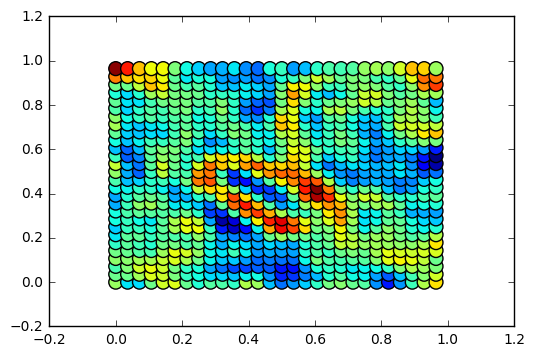

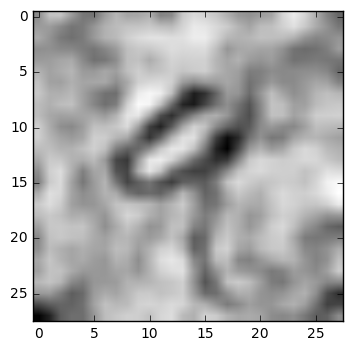

In [7]:
mnist_f = g.U.T.dot(mnist)
mnist_r = numpy.zeros(mnist_f.shape)
idx = numpy.argsort(mnist_f,0)
n = 100

for i in range(0,n):
    mnist_r[idx[i,:],0] = mnist_f[idx[i,:],0]
    
mnist_r = g.U.dot(mnist_r)
mnist_r = numpy.asarray(mnist_r)

pygsp.plotting.plot_signal(g,mnist_r)
plt.show()


plt.imshow(numpy.reshape(mnist_r,[gsz,gsz]), cmap='Greys')

# Convolution

We are now going to convolve a kernel over our signal.


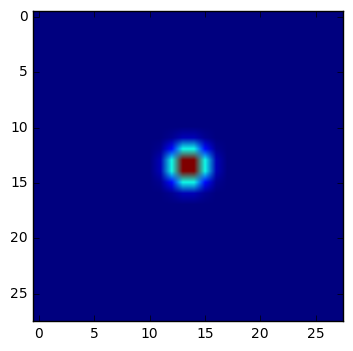

In [8]:
k1 = scipy.signal.gaussian(gsz,1)
k2 = scipy.signal.gaussian(gsz,1)
K = numpy.outer(k1,k2)
plt.imshow(K)
K = numpy.reshape(K,[K.size,1])

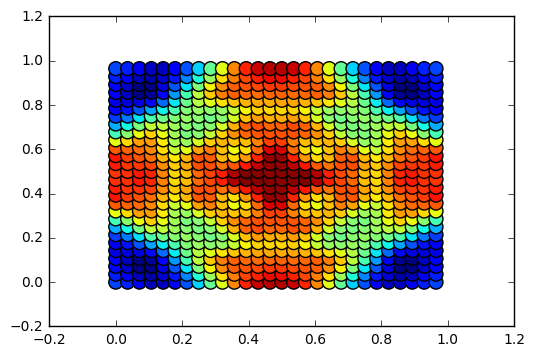

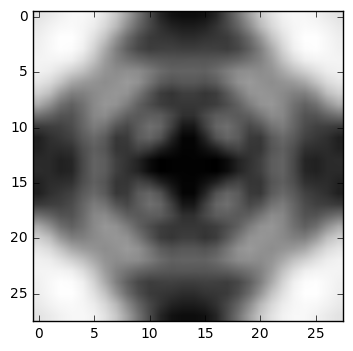

In [9]:
mnist_f = g.U.T.dot(mnist)
K_f = g.U.T.dot(K)
conv_f = numpy.multiply(mnist_f,K_f)
conv = g.U.dot(conv_f)
conv = numpy.asarray(conv)
pygsp.plotting.plot_signal(g,conv)
plt.show()
plt.imshow(numpy.reshape(conv,[gsz,gsz]), cmap='Greys')